# AM207 Homework 1
**Harvard University**<br>
**Fall 2018**<br>
**Instructors: Rahul Dave**<br>
**Due Date: ** Saturday, September 15th, 2018 at 11:59pm

##### Data: wine_quality_missing.csv


**Instructions:**

- Upload your final answers as well as your iPython notebook containing all work to Canvas.

- Structure your notebook and your work to maximize readability.

---

**Michelle (Chia Chi) Ho, Jiejun Lu, Jiawen Tong**

In [1]:
import numpy as np
import scipy.stats
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib import cm
import pandas as pd
%matplotlib inline

import seaborn.apionly as sns
from IPython.display import display
from scipy.stats import norm
np.random.seed(911)

/anaconda3/lib/python3.6/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


## Question 1: Don't Be Sensitive, We're Looking For False Positivity

**Coding not required**

As the U.S. aims to increase early identification and treatment of people with HIV, a greater focus has been placed on determining the accuracy of HIV tests in real-world settings in order to better identify individuals during the early (acute) stages of infection when transmission risk is especially high.  In order to quantify this, researchers from the University of California, San Francisco conducted a review of over 21,234 HIV tests given between the years 2003 and 2008 in some of the city's highest prevalence populations.  Two of the tests included in the study -- the OraQuick Advance Blood Rapid Antibody Test (a 3rd generation fingerstick blood test we'll henceforth call the **BRT**) and the OraQuick Advance Saliva Rapid Antibody Test (a 3rd generation saliva test we'll henceforth call the **SRT**) -- can be considered Rapidly Administered tests.  According to Wikipedia, the overall prevalence of adult HIV in the United States is 0.3%

You and your partner decide to undergo tests for HIV and the two of you are administered the SRT at an HIV screening clinic.  You're aware that the test you've been administered (one of the tests featured in the study) has a sensitivity (true positive rate) of 86.6% and a specificity (true negative rate) of 98.6%.

1.1. In the unfortunate event that your partner tests positive what is the probability that he/she has HIV?

1.2. Should you be concerned enough to ask for further testing or treatment for your partner?  Justify your answer quantitatively.

1.3. The medical staff at the screening clinic decides to independently administer the BRT as it is the only other test they can administer on site.  Based on the UCSF study above, you're aware that this test has a sensitivity (true positive rate) of 91.9% and a specificity of 99.6%.  What is the probability that your partner has the HIV if both tests come up positive (Make the assumption that the independent administration means that the tests are independent of each other)?

It turns out the screening clinic didn't have the second test and you and your partner were only able to be administered the SRT. However, on your way home you're reminded that your partner has spent almost all his/her life in the Bahamas where the prevalence of adult HIV is 3.3%.

1.4. What is the probability that your Bahamian partner has HIV given that he/she received a positive test result on the SRT?

1.5. How does the new information quantifiably affect your decision of whether you should  be concerned enough to ask for treatment or testing for your partner?

*Make sure to justify your decisions using your calculations.*

**Solution**:

<div class="answer-separator">
------------------------
</div>

<h4>1.1. In the unfortunate event that your partner tests positive what is the probability that he/she has HIV?</h4>

In [2]:
(0.3*86.6) / (0.3*86.6 + 99.7*1.4)

0.15692196182652815

<div class="answer">

<br>
$$
TPR = \frac{TP}{TP + FN} = \frac{p(T^+, D^+)}{p(D^+)} = p(T^+ | D^+) = 86.6\%
$$
<br>

$$
TNR = \frac{TN}{TN + FP} = \frac{p(T^-, D^-)}{p(D^-)} = p(T^- | D^-) = 98.6\%
$$
<br>

Given tests being positive, the probability of having HIV is:
<br>

$$
p(D^+ | T^+) = \frac{p(D^+, T^+)}{p(T^+)} = \frac{p(D^+) p(T^+ | D^+)}{p(D^+) p(T^+ | D^+) +  p(D^-) p(T^+ | D^-)}
= \frac{(0.3\%)(86.6\%)}{(0.3\%)(86.6\%) + (99.7\%)(1.4\%)} = 15.7\%
$$
<br>

</div>

##### <div class="answer-separator">
------------------------
</div>

<h4>1.2. Should you be concerned enough to ask for further testing or treatment for your partner?  Justify your answer quantitatively.</h4>

In [3]:
(0.3*86.6*86.6) / (0.3*86.6*86.6 + 99.7*1.4*1.4) # p(D+ | T+, T+)

0.9200860433161029

In [4]:
(0.3*13.4*86.6) / (0.3*13.4*86.6 + 99.7*1.4*98.6) # p(D+ | T+, T-)

0.024671455460812772

<div class="answer">

<br>
Based on 1.1, the probability of having HIV given test positive is around 16%. This is much lower than guessing randomly (50%), so we would not be too concerned. However, given the computations below, if we ask for further testing, we would be much more certain whether the partner has HIV or not basing our inference on 2 consecutive tests. Therefore, it would be wise to ask for further testing.

<br>
(1) If the second test is still positive: the probability of having HIV would be very high:
<br>
$$
p(T^+, T^+ | D^+) = p(T^+|D^+) p(T^+|D^+) = (86.6\%)^2
$$

<br>
$$
p(T^+, T^+ | D^-) = p(T^+|D^-) p(T^+|D^-) = (1.4\%)^2
$$

<br>
$$
p(D^+ | T^+, T^+) = \frac{p(D^+)p(T^+, T^+ | D^+)}{p(D^+)p(T^+, T^+ | D^+) + p(D^-)p(T^+, T^+ | D^-)}
$$

<br>
$$
= \frac{(0.3\%)(86.6\%)^2}{(0.3\%)(86.6\%)^2 + (99.7\%)(1.4\%)^2} = 92\%
$$

<br>
(2) If the second test is negative: the probability of having HIV would be very low:
<br>
$$
p(T^+, T^- | D^+) = p(T^+|D^+) p(T^-|D^+) = (86.6\%)(13.4\%)
$$

<br>
$$
p(T^+, T^- | D^-) = p(T^+|D^-) p(T^-|D^-) = (1.4\%)(98.6\%)
$$

<br>
$$
p(D^+ | T^+, T^-) = \frac{p(D^+)p(T^+, T^- | D^+)}{p(D^+)p(T^+, T^- | D^+) + p(D^-)p(T^+, T^- | D^-)}
$$

<br>
$$
= \frac{(0.3\%)(86.6\%)(13.4\%)}{(0.3\%)(86.6\%)(13.4\%) + (99.7\%)(1.4\%)(98.6\%)} = 2.5\%
$$

<br>

</div>

<div class="answer-separator">
------------------------
</div>

<h4>1.3. The medical staff at the screening clinic decides to independently administer the BRT as it is the only other test they can administer on site.  Based on the UCSF study above, you're aware that this test has a sensitivity (true positive rate) of 91.9% and a specificity of 99.6%.  What is the probability that your partner has the HIV if both tests come up positive (Make the assumption that the independent administration means that the tests are independent of each other)?</h4>

In [5]:
(0.3*86.6*91.9) / (0.3*86.6*91.9 + 99.7*1.4*0.4)

0.9771498170168217

<div class="answer">

<br>
For SRT:
<br>
$$
TPR = p(T_s^+ | D^+) = 86.6\%
$$
<br>
$$
TNR = p(T_s^- | D^-) = 98.6\%
$$
<br>

For BRT: 
<br>
$$
TPR = p(T_b^+ | D^+) = 91.9\%
$$
<br>
$$
TNR = p(T_b^- | D^-) = 99.6\%
$$
<br>

$$
p(D^+ | T_s^+, T_b^+) = \frac{p(D^+) p(D^+ | T_s^+, T_b^+)}{p(D^+) p(D^+ | T_s^+, T_b^+) + p(D^-) p(D^- | T_s^+, T_b^+)}
$$

<br>
$$
= \frac{p(D^+) p(T_s^+ | D^+) p(T_b^+ | D^+)}{p(D^+) p(T_s^+ | D^+) p(T_b^+ | D^+) + p(D^-) p(T_s^+ | D^-) p(T_b^+ | D^-)}
$$

<br>
$$ = \frac{(0.3\%)(86.6\%)(91.9\%)}{(0.3\%)(86.6\%)(91.9\%) + (99.7\%)(1.4\%)(0.4\%)} = 97.7\%
$$
</div>

<div class="answer-separator">
------------------------
</div>

<h4>1.4. What is the probability that your Bahamian partner has HIV given that he/she received a positive test result on the SRT?</h4>

In [6]:
(3.3*86.6) / (3.3*86.6 + 96.7*1.4)

0.6785544686105043

<div class="answer">

In Bahamas:
<br>
$$
p(D^+) = 3.3\%
$$
$$
p(D^-) = 96.7\%
$$

For SRT:
<br>
$$
TPR = p(T_s^+ | D^+) = 86.6\%
$$
<br>
$$
TNR = p(T_s^- | D^-) = 98.6\%
$$
<br>

Given a positive SRT result, the probability of having HIV is:
<br>

$$
p(D^+ | T^+) = \frac{p(D^+, T^+)}{p(T^+)} = \frac{p(D^+) p(T^+ | D^+)}{p(D^+) p(T^+ | D^+) +  p(D^-) p(T^+ | D^-)}
= \frac{(3.3\%)(86.6\%)}{(3.3\%)(86.6\%) + (96.7\%)(1.4\%)} = 67.9\%
$$
<br>

</div>

<div class="answer-separator">
------------------------
</div>

<h4>1.5. How does the new information quantifiably affect your decision of whether you should  be concerned enough to ask for treatment or testing for your partner?</h4>

<div class="answer">

<br>
The new information that in the Bahamas HIV has prevalence of 3.3% largely increased $p(D^+ | T_s^+)$ (from 16% to 68%). The risk is much higher, so we should definitely be concerned enough to ask for treatment or testing.
<br>
<br>

</div>

<div class="answer-separator">
------------------------
</div>

## Question 2: Visualize Yourself Missing Your Data

**Some Coding required**

Missing data is a very important topic in statistics and machine learning and we may touch upon it a few times throughout the course. Let us begin to explore how to handle missing data in our analysis.  We'll be working with a dataset from the UCI Machine Learning Repository that uses a variety of wine chemical predictors to classify wines grown in the same region in Italy.  Each line represents 13 (mostly chemical) predictors of the response variable wine class, including things like alcohol content, hue, and phenols.  Unfortunately some of the predictor values were lost in measurement.  You'll find the dataset in a file called `wine_quality_missing.csv`.

2.1. Read the data in the `wine_quality_missing.csv` into a pandas dataframe and store the dataframe in the variable `wine_df`.  How many observations are in the dataset?  

In [7]:
wine_df = pd.read_csv('wine_quality_missing.csv')
display(wine_df.head())

print(wine_df.shape)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1
1,13.20,1.78,2.14,NaN,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1
3,14.37,1.95,2.50,NaN,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,NaN,4.32,1.04,2.93,735.0,1


(178, 14)


**ANSWER** 

There are 178 observations in the dataset.

---

2.2. One way to handle missing data is to just totally ignore it by removing any rows that have any missing values.  This is called *drop imputation*.  Use drop imputation on our wine quality dataframe and store the resulting dataframe in the variable `wine_drop`.  How many observations does the drop imputed dataset have?

In [8]:
wine_drop = wine_df.dropna()
print(wine_drop.shape) 

(43, 14)


**ANSWER**

There are 43 observations in the drop imputed dataset.

---

2.3. Visualize using a normed histogram the values of Ash predictor in the drop imputed dataframe.  Overlay a fitted normal distribution on your plot.  Make sure to title the plot, include a legend and label axes.

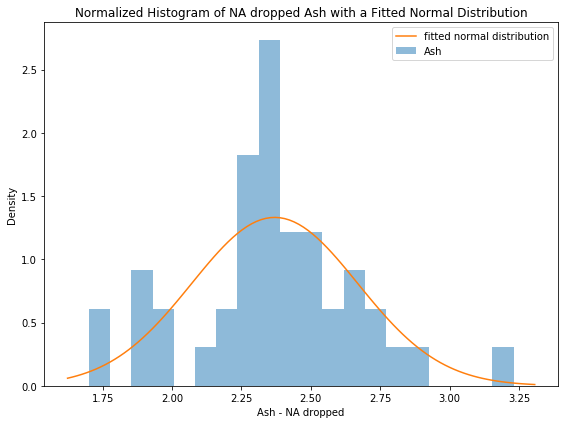

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# fit a normal distribution to 'Ash'
mu, std = norm.fit(wine_drop['Ash'])

# histogram of 'Ash'
ax.hist(wine_drop['Ash'], bins=20, normed=True, alpha=0.5, label='Ash')

# plot the fitted normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p_drop = norm.pdf(x, mu, std)
ax.plot(x, p_drop, '-', label='fitted normal distribution')

# include legend and labels
ax.set_title('Normalized Histogram of NA dropped Ash with a Fitted Normal Distribution')
ax.set_xlabel('Ash - NA dropped')
ax.set_ylabel('Density')
plt.legend()
plt.tight_layout()

2.4. What are the mean and standard deviation of the values of the Ash feature in your drop imputed dataset?

In [10]:
print('mean = {}'.format(np.mean(wine_drop['Ash'])))
print('std = {}'.format(np.std(wine_drop['Ash'])))

mean = 2.369767441860465
std = 0.2996857918281887


2.5. Another way to handle missing data is to replace any missing value with the mean of the non-missing values in that *column*.  This is called *mean imputation*.  How many rows does our mean imputed dataset have?

In [11]:
np.mean(wine_df)

Alcohol                          13.015031
Malic acid                        2.365963
Ash                               2.366218
Alcalinity of ash                19.508861
Magnesium                        99.870370
Total phenols                     2.332722
Flavanoids                        2.042278
Nonflavanoid phenols              0.362704
Proanthocyanins                   1.596211
Color intensity                   5.140123
Hue                               0.953434
OD280/OD315 of diluted wines      2.621707
Proline                         748.644578
Class                             1.938202
dtype: float64

In [12]:
wine_mean_imputed = wine_df.fillna(np.mean(wine_df))
print(wine_mean_imputed.shape)

(178, 14)


**ANSWER**

There are 178 rows in the mean imputed dataset.

---

2.6. Visualize using a normed histogram the values of Ash predictor in the mean imputed dataframe.  Overlay a fitted normal distribution on your plot.  Make sure to title the plot, include a legend and label axes.

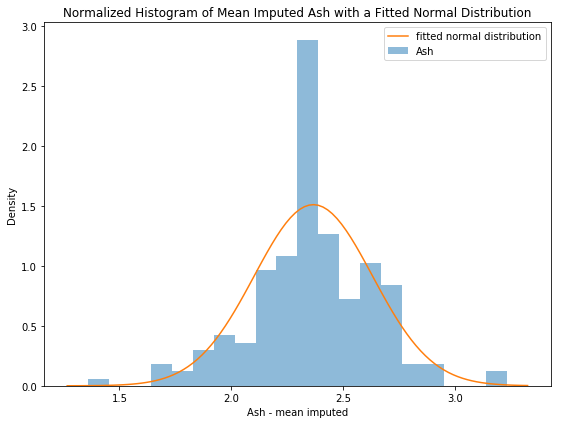

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# fit a normal distribution to 'Ash'
mu, std = norm.fit(wine_mean_imputed['Ash'])

# histogram of 'Ash'
ax.hist(wine_mean_imputed['Ash'], bins=20, density=True, alpha=0.5, label='Ash')

# plot the fitted normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p_mean_imputed = norm.pdf(x, mu, std)
ax.plot(x, p_mean_imputed, '-', label='fitted normal distribution')

# include legend and labels
ax.set_title('Normalized Histogram of Mean Imputed Ash with a Fitted Normal Distribution')
ax.set_xlabel('Ash - mean imputed')
ax.set_ylabel('Density')
plt.legend()
plt.tight_layout()

2.7. What are the mean and standard deviation of the Ash predictor values in your mean imputed dataset?  How do they compare to the mean and standard deviation of the drop imputed dataset?

In [14]:
print('mean = {}'.format(np.mean(wine_mean_imputed['Ash'])))
print('std = {}'.format(np.std(wine_mean_imputed['Ash'])))

mean = 2.36621794871795
std = 0.26427629172770295


**ANSWER**

- mean = 2.36621794871795

- std = 0.2650217834532965

The mean imputed dataset has a slightly smaller mean and a smaller standard deviation for the Ash predictor values than the NA dropped dataset.

---

## Part 3: Walk Softly and Carry a Broken Stick  

**Some Coding required**

3.1  A well-known probability problem, the **Broken Stick Problem** can be formulated as follows. *A stick is broken up at two points, chosen at random along its
length. Show that the probability that the pieces obtained form a triangle is 1/4.*  Write a function `simulate_broken_stick` that runs takes an integer parameter `n_sims`, runs that many simulations of the broken stick problem and returns a floating point number representing an estimate of the probability that the pieces of a stick randomly broken in two places form a triangle.  

**Hints**:

1. Use either np.random.rand or scipy.stats.uniform.rvs to simulate stick-breaking
2. Think about the triangle inequality

3.2 Run your function `simulate_broken_stick` with `n_sims` set to be equal to 50 and 1000.  What are your two estimates of the solution to the broken stick problem?

3.3 (Optional) Provide an analytic proof of the **Broken Stick Problem**.

**Hints**:

1. There's a very nice geometric proof taking advantage of [Viviani's Theorem][1].  Argue that every point in the equilateral triangle with height equal to the length of the stick maps to a particular breaking of the stick.  Divide the equilateral triangle into subtriangles by joining the midpoints.  What does it mean for a point to be outside the central equilateral subtriangle?
2. There's a more straightforward proof treating the breaking of the stick as joint uniform random variables.  What conditions does the triangle inequality impose on the joint random variable? How do you calculate the probability that the joint uniform meets those conditions? 

[1]: https://en.wikipedia.org/wiki/Viviani%27s_theorem

**Solution**:

<h4> 3.1  A well-known probability problem, the **Broken Stick Problem** can be formulated as follows. *A stick is broken up at two points, chosen at random along its
length. Show that the probability that the pieces obtained form a triangle is 1/4.*  Write a function `simulate_broken_stick` that runs takes an integer parameter `n_sims`, runs that many simulations of the broken stick problem and returns a floating point number representing an estimate of the probability that the pieces of a stick randomly broken in two places form a triangle.</h4>

In [15]:
def simulate_broken_stick(n_sims=500):
    
    # define your probability estimate and initialize it to 0
    probability_estimate = 0
    
    # run your simulation and calculate probability_estimate
    count = 0
    for i in range(n_sims):
        
        # generate 2 break points and compute length
        values = np.random.rand(2)
        values.sort()
        sides = [values[0], values[1]-values[0], 1-values[1]]

        # sort lengths
        sides.sort()
        count += (sides[0]+sides[1]) > sides[2]
    
    probability_estimate = count/n_sims
    
    return probability_estimate

<h4>3.2 Run your function `simulate_broken_stick` with `n_sims` set to be equal to 50 and 1000.  What are your two estimates of the solution to the broken stick problem?</h4>

In [16]:
estimate_50 = simulate_broken_stick(n_sims=50)  # calculate estimate for 50 simulations
estimate_1000 = simulate_broken_stick(n_sims=1000)  # calculate estimate for 1000 simulations

In [17]:
## Make sure you present your answers somewhere here
print('estimate_50 = {}'.format(estimate_50))
print('estimate_1000 = {}'.format(estimate_1000))

estimate_50 = 0.3
estimate_1000 = 0.254


<h4>3.3 (Optional) Provide an analytic proof of the **Broken Stick Problem**.</h4>

<div class="answer">

<br>
Assume the length of stick is 1. The two cuts are x and y.
<br>
<br>
**(1) 0 < x < y < 1**:
<br>
The lengths of the 3 sides are: x, y-x, and 1-y
<br>
Froming a triangle, the sum of any 2 sides' lengths should be greater than the length of the 3rd side:
<br>
  `x + (y-x) > 1-y` and
`x + (1-y) > y-x` and 
`(y-x) + (1-y) > x`,

<br>
<br>
which can be simplified to:
<br>
`y > 1/2` and `0 < x < y < x+1/2` and `x < 1/2`
<br>

<br>
Under these conditions, the probability of forming a triangle is the ratio of the area enclosed by these boundaries to the area of the unit square. Therefore p = 1/8, see illustration below.

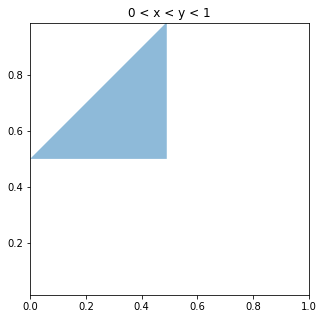

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

x = np.arange(0, 1/2, 0.01)
y1 = 1/2
y2 = 1/2 + x

ax.fill_between(x, y1, y2, alpha=0.5)
plt.axis('equal')
plt.gca().set_xlim(0, 1)
plt.gca().set_ylim(0, 1)
plt.title('0 < x < y < 1')
plt.show()

<br>
**(2) 0 < y < x < 1**:
<br>
By symmetry, the probability of forming a triangle is p = 1/8 too. 
<br>
<br>
**By (1) and (2), the total probability of forming a triangle is 1/8 * 2 = 1/4**

</div>